In [1]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import pandas as pd

import math
import sys
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/MC_studies/Dstlnu_Bt_generic/util_funcs/')
from pandas_colFuncs import B_ID, whichBisSig, D0_decay_type, whichBisSig_NAHS

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [5]:
nfs_path = "/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/appliedNNdata/8thRun/"

## load dfs

In [3]:
df_Ups4S = pd.read_csv(nfs_path + "Ups4S_df.csv")
online_nonHc_FSPs = pd.read_csv(nfs_path + "nonHc_FSPs_df.csv")

In [6]:
offline_nfs_path = "/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/"
root_subdir = "NAHS_allEvts_twoSubs_fixedD0run/"  
root_path = offline_nfs_path + "NAHS/onlineDataProd/" + root_subdir 

df_FSPs_final = pd.read_csv(root_path + "final_df_FSPs_preProcessed_NAHS.csv")

## impute nan in online data

In [7]:
imputelist = [["pionID",-1.],["kaonID",-1.],["electronID",-1.],["muonID",-1.],["protonID",-1.]
              ,["clusterReg",-1.],["clusterE9E21",-1.]
              ]
for impute in imputelist:
    column_name = impute[0]
    impute_val = impute[1]

    print(online_nonHc_FSPs[online_nonHc_FSPs[column_name].isna() == True].shape[0])
    mask = online_nonHc_FSPs[column_name].isna() == 1
    online_nonHc_FSPs.loc[mask, column_name] = impute_val
    print(online_nonHc_FSPs[online_nonHc_FSPs[column_name].isna() == True].shape[0])

107416
0
107416
0
107416
0
107416
0
107416
0
37668
0
37668
0


In [8]:
nn_vars = ["px","py","pz","E","M","charge","dr","dz","clusterReg","clusterE9E21","pionID","kaonID",
           "electronID","muonID","protonID"]

In [9]:
len(nn_vars)

15

In [10]:
bins_dict = {
    "px":  np.linspace(-2.5, 2.5, 40),
    "py":   np.linspace(-2.5, 2.5, 40),
    "pz":   np.linspace(-2.5, 2.5, 40),
    "E":   np.linspace(0, 4, 40),
    "M":   np.linspace(0, 2, 40),
    "charge":   np.linspace(-10, 10, 40),
    "dr":   np.linspace(0, 1, 40),
    "dz":   np.linspace(-1, 1, 40),
    "clusterReg":   np.linspace(-2.5, 5, 40),
    "clusterE9E21":   np.linspace(-2.5, 2.5, 40),
    "pionID":   np.linspace(-1, 1, 40),
    "kaonID":   np.linspace(-1, 1, 40),
    "electronID":   np.linspace(-1, 1, 40),
    "muonID":   np.linspace(-1, 1, 40),
    "protonID":   np.linspace(-1, 1, 40),
     "x":   np.linspace(-2.5, 2.5, 40),
    "y":   np.linspace(-2.5, 2.5, 40),
    "z":   np.linspace(-2.5, 2.5, 40)
    }

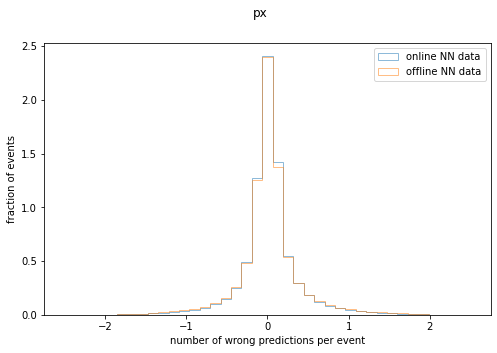

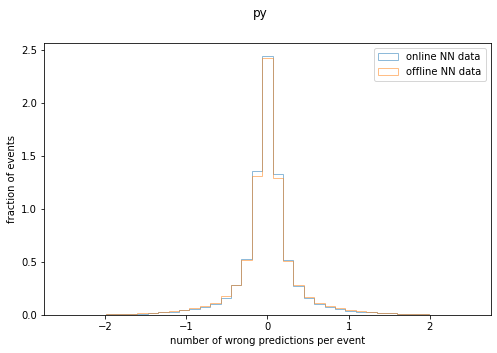

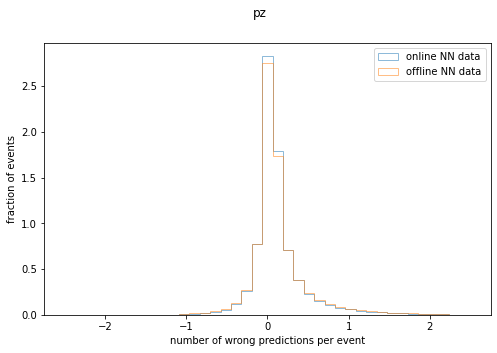

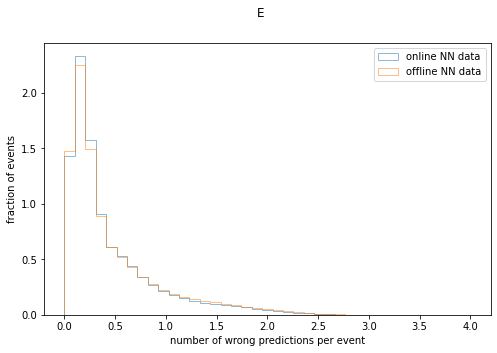

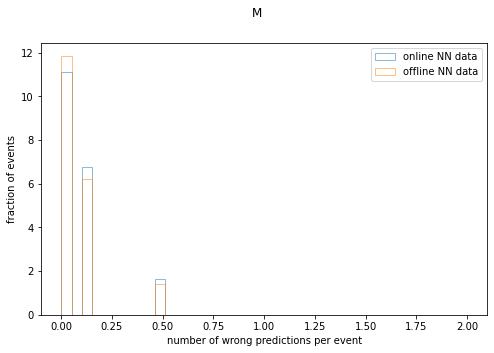

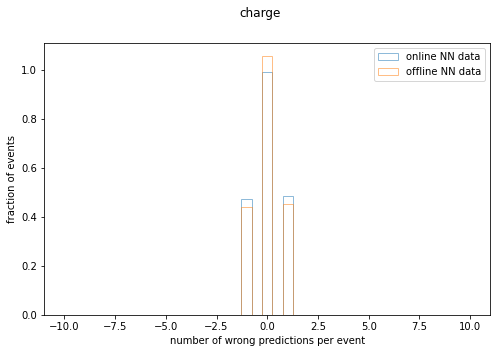

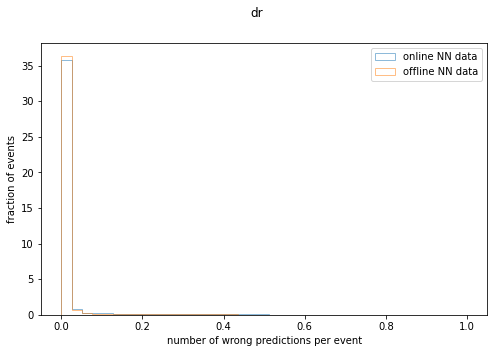

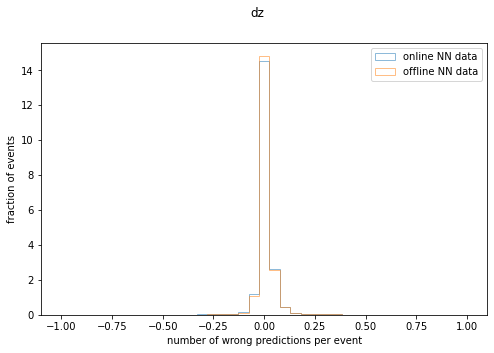

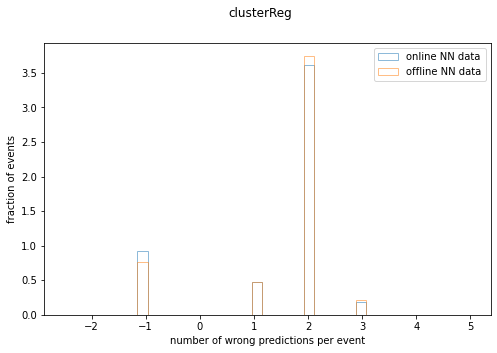

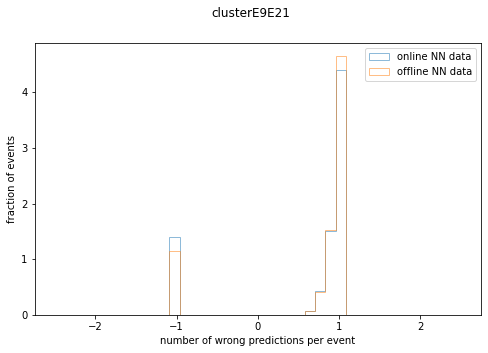

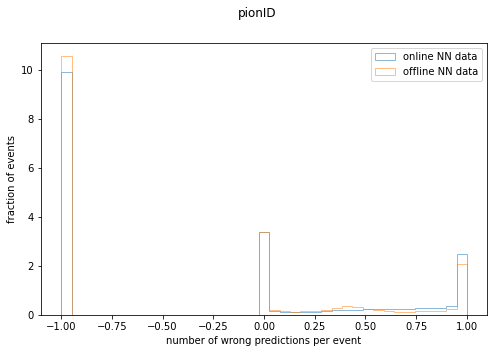

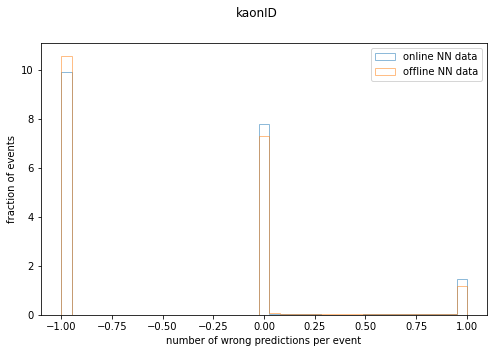

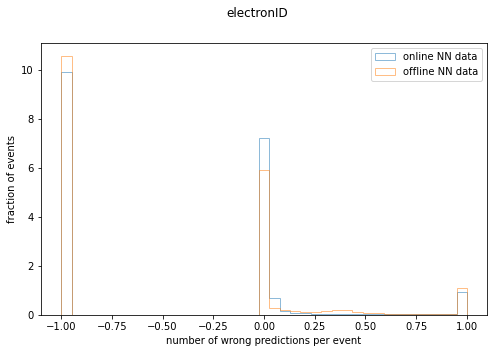

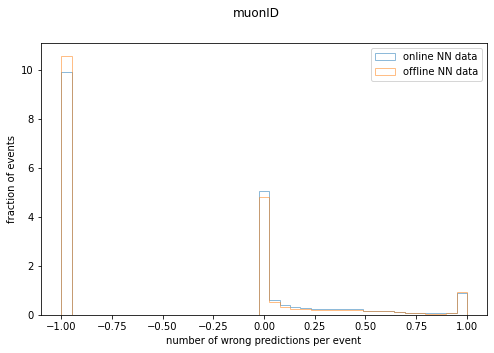

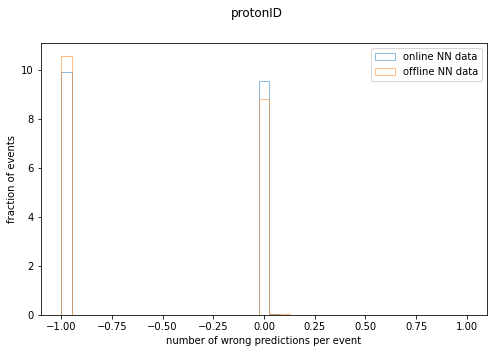

In [11]:
for var in nn_vars:
    fig, ax = plt.subplots()
    #num_steps=20
    bins = bins_dict[var]

    fig.suptitle(f'{var}')
    fig.set_size_inches(8, 5)

    ax.set_xlabel(r'number of wrong predictions per event')
    ax.set_ylabel("fraction of events")

    #plt.xticks(np.arange(0, num_steps, step=1))
    ax.hist(online_nonHc_FSPs[var], bins, density=True, alpha=0.5, label="online NN data" ,histtype='step')
    ax.hist(df_FSPs_final[var],bins, density=True, alpha=0.5, label="offline NN data" ,histtype='step')

    ax.legend(loc='upper right')

    #plt.grid()

    #plt.savefig('plots/onlineVSofflineNN_numErrorsPerEvent.pdf')

0 0 px
1 0 py
2 0 pz
3 0 E
4 0 M
0 1 charge
1 1 dr
2 1 dz
3 1 clusterReg
4 1 clusterE9E21
0 2 pionID
1 2 kaonID
2 2 electronID
3 2 muonID
4 2 protonID


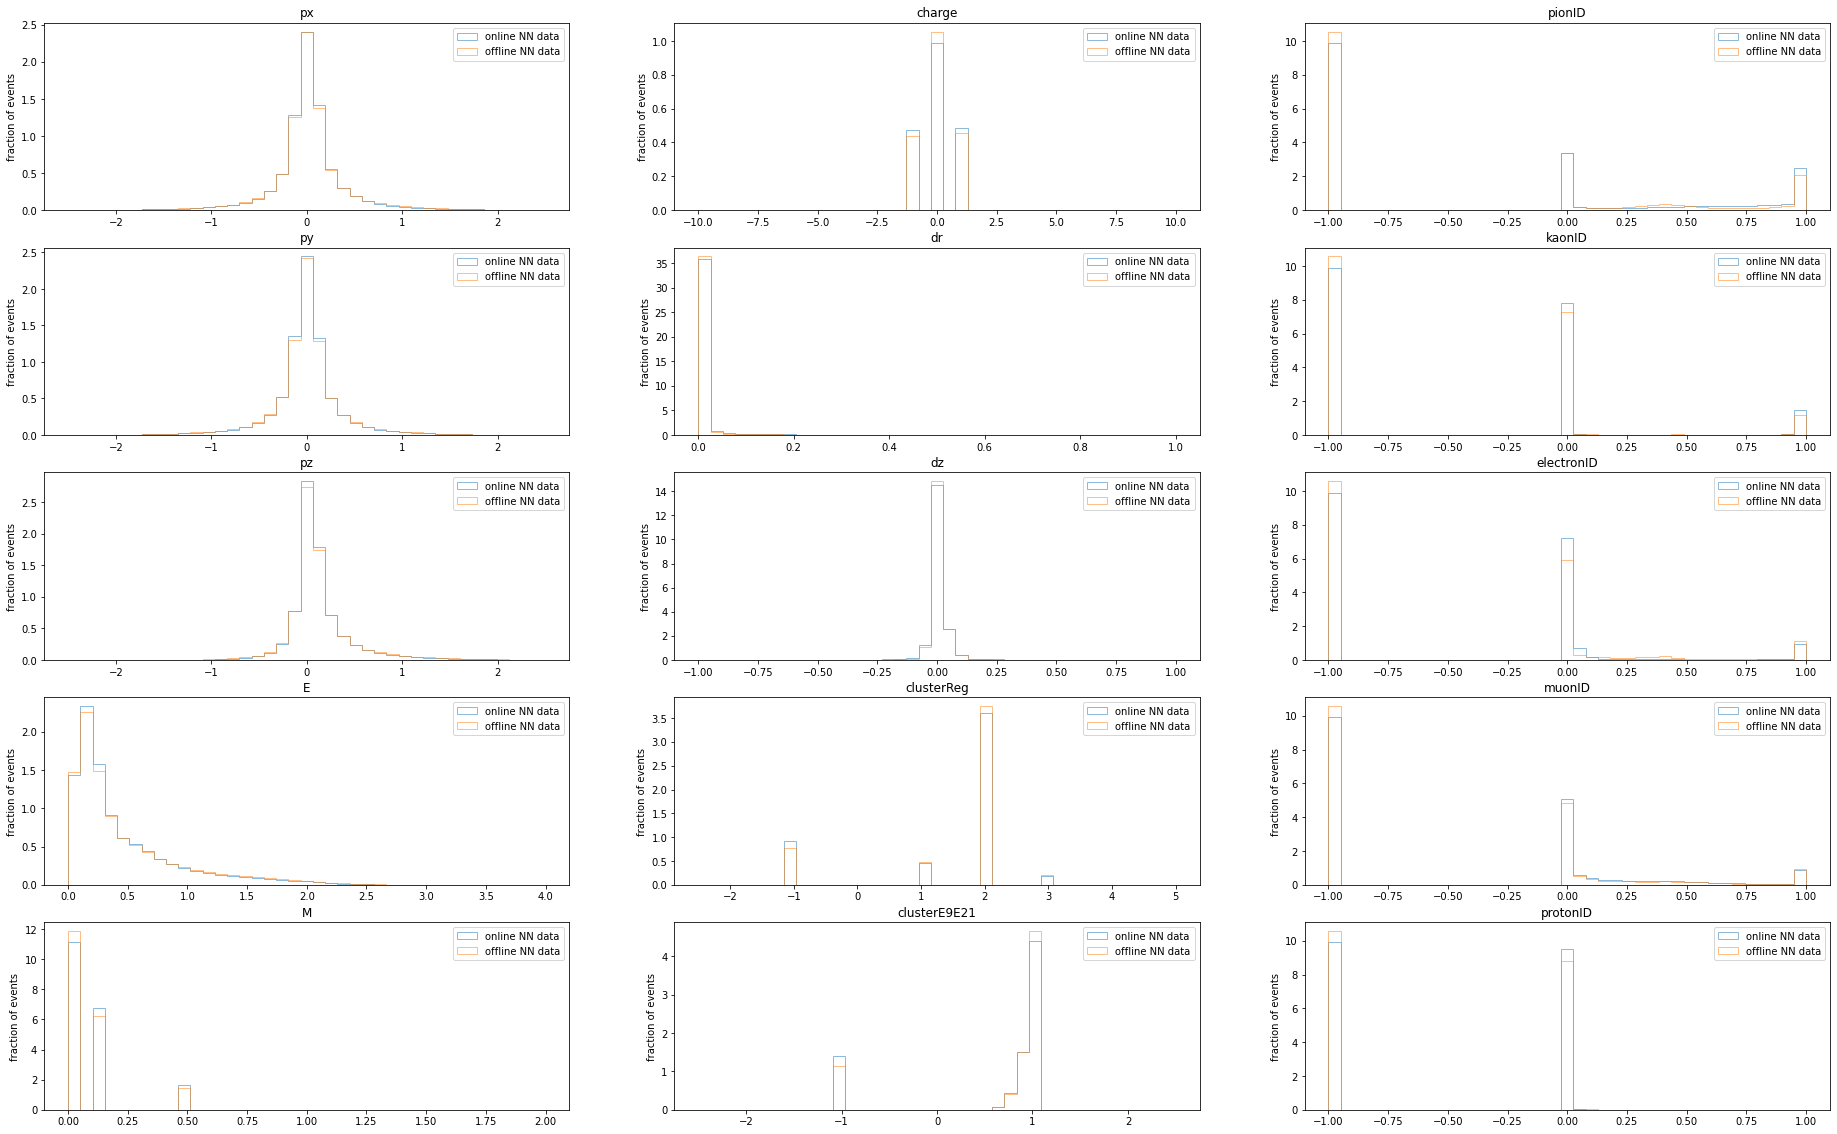

In [12]:
dim_x = 5
fig, axs = plt.subplots(dim_x, 3)
fig.set_size_inches(32, 20)


for i, var in enumerate(nn_vars):
    
    idx=i % dim_x
    idy=math.floor(i/dim_x)
    print(idx, idy, var)
    
    ax = axs[idx, idy]   
    
    bins = bins_dict[var]
    ax.set_title(f'{var}')

    #ax.set_xlabel(r'number of wrong predictions per event')
    ax.set_ylabel("fraction of events")

    #plt.xticks(np.arange(0, num_steps, step=1))
    ax.hist(online_nonHc_FSPs[var], bins, density=True, alpha=0.5, label="online NN data" ,histtype='step')
    ax.hist(df_FSPs_final[var],bins, density=True, alpha=0.5, label="offline NN data" ,histtype='step')

    ax.legend(loc='upper right')

    #plt.grid()

plt.savefig('plots/onlineVSofflineNN_allInputDistributions.pdf')

In [13]:
numFSPs_offline = pd.DataFrame({'count' : df_FSPs_final.groupby( ["__event__"] ).size()}).reset_index()
numFSPs_online = pd.DataFrame({'count' : online_nonHc_FSPs.groupby( ["__event__","__production__"] ).size()}).reset_index()

df_FSPs_final_charged = df_FSPs_final[df_FSPs_final["PDG"] != 22]
numFSPs_online_charged = online_nonHc_FSPs[online_nonHc_FSPs["PDG"] != 22]
numFSPs_offline_charged = pd.DataFrame({'count' : df_FSPs_final_charged.groupby( ["__event__"] ).size()}).reset_index()
numFSPs_online_charged = pd.DataFrame({'count' : numFSPs_online_charged.groupby( ["__event__","__production__"] ).size()}).reset_index()

df_FSPs_final_neutral = df_FSPs_final[df_FSPs_final["PDG"] == 22]
numFSPs_online_neutral = online_nonHc_FSPs[online_nonHc_FSPs["PDG"] == 22]
numFSPs_offline_neutral = pd.DataFrame({'count' : df_FSPs_final_neutral.groupby( ["__event__"] ).size()}).reset_index()
numFSPs_online_neutral = pd.DataFrame({'count' : numFSPs_online_neutral.groupby( ["__event__","__production__"] ).size()}).reset_index()


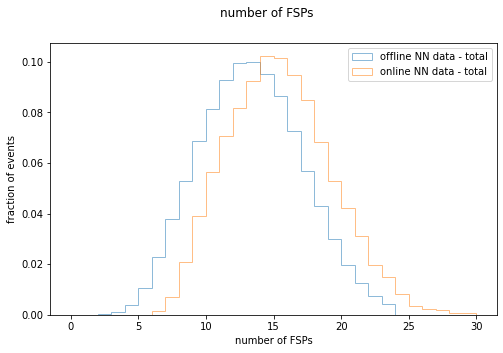

In [14]:
fig, ax = plt.subplots()
bins =  np.linspace(0, 30, 31)

fig.suptitle('number of FSPs')
fig.set_size_inches(8, 5)

ax.set_xlabel(r'number of FSPs')
ax.set_ylabel("fraction of events")

#plt.xticks(np.arange(0, num_steps, step=1))

ax.hist(numFSPs_offline['count'], bins, density=True, alpha=0.5, label="offline NN data - total" ,histtype='step')
ax.hist(numFSPs_online['count'],bins, density=True, alpha=0.5, label="online NN data - total" ,histtype='step')


ax.legend(loc='upper right')

#plt.grid()

plt.savefig('plots/onlineVSofflineNN_numFSPs_total.pdf')

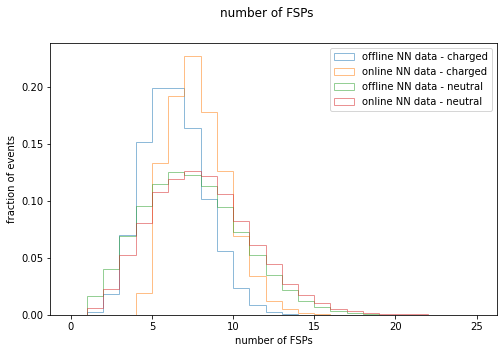

In [15]:
fig, ax = plt.subplots()
bins =  np.linspace(0, 25, 26)

fig.suptitle('number of FSPs')
fig.set_size_inches(8, 5)

ax.set_xlabel(r'number of FSPs')
ax.set_ylabel("fraction of events")

#plt.xticks(np.arange(0, num_steps, step=1))

ax.hist(numFSPs_offline_charged['count'], bins, density=True, alpha=0.5, label="offline NN data - charged" ,histtype='step')
ax.hist(numFSPs_online_charged['count'],bins, density=True, alpha=0.5, label="online NN data - charged" ,histtype='step')

ax.hist(numFSPs_offline_neutral['count'], bins, density=True, alpha=0.5, label="offline NN data - neutral" ,histtype='step')
ax.hist(numFSPs_online_neutral['count'],bins, density=True, alpha=0.5, label="online NN data - neutral" ,histtype='step')



ax.legend(loc='upper right')

#plt.grid()

plt.savefig('plots/onlineVSofflineNN_numFSPs_charged_neutral.pdf')

## what is offline accuracy if num charged >= 5 is required

In [17]:
evts = numFSPs_offline_charged[numFSPs_offline_charged["count"] >= 5]["__event__"]

In [18]:
subset_offlineFSPs = df_FSPs_final[df_FSPs_final['__event__'].isin(evts)]

In [19]:
subset_offlineFSPs.keys()

Index(['Unnamed: 0', 'Unnamed: 0.1', '__experiment__', '__run__', '__event__',
       '__candidate__', '__ncandidates__', '__weight__', 'genMothPDG_0',
       'genMothPDG_1', 'genMothPDG_2', 'genMothPDG_3', 'genMothPDG_4',
       'genMothPDG_5', 'genMothPDG_6', 'genMothPDG_7', 'genMothPDG_8',
       'genMothPDG_9', 'genMotherID_0', 'genMotherID_1', 'genMotherID_2',
       'genMotherID_3', 'genMotherID_4', 'genMotherID_5', 'genMotherID_6',
       'genMotherID_7', 'genMotherID_8', 'genMotherID_9',
       'mcMother0_uniqParID', 'mcMother1_uniqParID', 'mcMother2_uniqParID',
       'mcMother3_uniqParID', 'mcMother4_uniqParID', 'mcMother5_uniqParID',
       'mcMother6_uniqParID', 'mcMother7_uniqParID', 'mcMother8_uniqParID',
       'mcMother9_uniqParID', 'cmpx', 'cmpy', 'cmpz', 'cmE', 'isSignal',
       'uniqueParticleIdentifier', 'mcErrors', 'mcPDG', 'genMotherID',
       'genMotherP', 'genMotherPDG', 'charge', 'dr', 'dz', 'clusterReg',
       'clusterE9E21', 'M', 'PDG', 'genParticleID', 'p